In [1]:
import numpy as np 

# Get the randow number, '-0.5' means get negative numbers
np.random.rand(3,3) - 0.5

array([[-0.41434619,  0.45369297,  0.4946113 ],
       [-0.14427991,  0.12668757,  0.41167991],
       [ 0.12525793, -0.11807926, -0.08080843]])

In [2]:
import numpy as np 

# for sigmoid function expit()
import scipy.special

# neuralNetwork class definition
class neuralNetwork:
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrates):

        # set number of nodes in each input, hidden and output layers
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # link weight matrices, Wih and Who
        # weight inside the arrays are w_i_j, where link from nodes i to nodes j
    
        # the easy way
        # self.wih = (np.random.rand(self.hnodes, self.inodes) - 0.5)
        # self.who = (np.random.rand(self.onodes, self.hnodes) - 0.5)

        # 
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5)\
                                ,(self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5)\
                                ,(self.onodes, self.hnodes))
        # learning rate
        self.lr = learningrates
        pass

        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)

    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert list to 2d array 
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(targets_list, ndmin = 2).T

        # calculate the signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)

        # calculate the signals emerging from hidden layer
        hidden_output = self.activation_function(hidden_inputs)

        # calculate the signals into final output layer
        final_input = np.dot(self.who, hidden_output)

        # calculate the signals emerging from final out layer
        final_output = self.activation_function(final_input)        

        # Core of neural network
        # error = (target - output)
        output_error = targets_list - final_output

        # hidden layer error is the outputs error, split by weights, recombined at hidden layer
        hidden_error = np.dot(self.who.T, output_error)

        # update the weights for link between the hidden layers and ouput layers
        self.who += self.lr * np.dot((output_error * final_output *\
                            (1 - final_output)), np.transpose(hidden_output))
        # update the weights for link between the input layers and hidden layers
        self.wih += self.lr * np.dot((hidden_error * hidden_output *\
                            (1 - hidden_output)), np.transpose(hidden_output))
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin= 2).T

        # calculate the signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)

        # calculate the signals emerging from hidden layer
        hidden_output = self.activation_function(hidden_inputs)

        # calculate the signals into final output layer
        final_input = np.dot(self.who, hidden_output)
        
        # calculate the signals emerging from final out layer
        final_output = self.activation_function(final_input)
        return final_output
    
n = neuralNetwork(3,3,3,0)
n.query([1.0, 0.5, -1.5])


array([[0.57140419],
       [0.44371755],
       [0.42941531]])

In [3]:
# set number of input, hidden and output nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

# learning rate is 0.3
learning_rate = 0.3

# create instance of neural networl
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

lable is 0


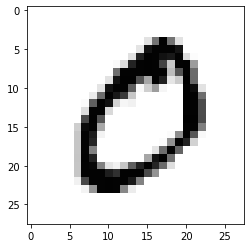

In [16]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

datefile = open(r'D:\GitHub\Neural-Network\mnist_dateset\mnist_train_100.csv', 'r')
datelist = datefile.readlines()
datefile.close()
len(datelist)
datelist[0]

allvalues = datelist[1].split(',')
print('lable is', allvalues[0])

image_array = np.asfarray(allvalues[1:]).reshape((28,28))
pyplot.imshow(image_array, cmap = 'Greys', interpolation= None)




